# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [104]:
# Читаем данные
df = pd.read_csv('train_features_with_answers.csv')
# df.head()

In [105]:
# Про характеристики прочитайте в источнике
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         426 non-null    float64
 3   address     449 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

sex
F    257
M    189
D      5
C      1
B      1
A      1
Name: count, dtype: int64


<Axes: >

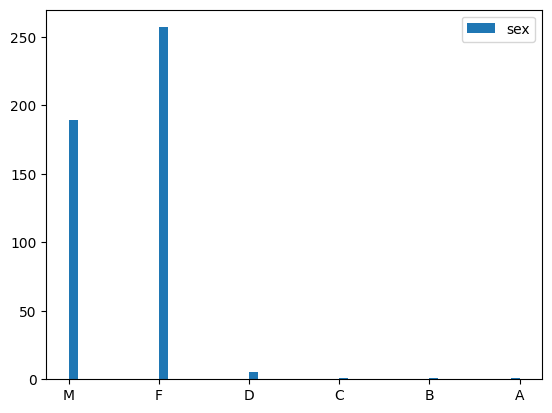

In [57]:
print(df["sex"].value_counts())
df["sex"].hist(grid=False, bins=50, legend=True)

## Характеристика: "Age"

<Axes: >

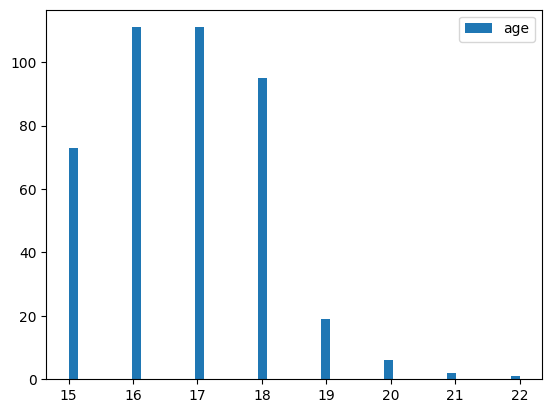

In [58]:
#если не обращать внимание на выбросы:
age = df['age'][(10<= df['age']) & (df['age']<=23)]
#если хочется посмотреть на выбросы, то надо раскоментить строку выше
age.hist(grid=False, bins=50, legend=True)

## Характеристика: "Weekly study time"
>❗🚩поправьте тут на "studytime", проще же будет студентам.. либо это фишка такая?   

In [59]:
df["studytime"].value_counts()

,count
studytime,
2,213
1,156
3,64
4,21


## Характеристика: "Romantic Relationship"

In [60]:
df["romantic"].value_counts()

,count
romantic,
no,289
yes,165


## Характеристика: "Alcohol Consumption"

<Axes: >

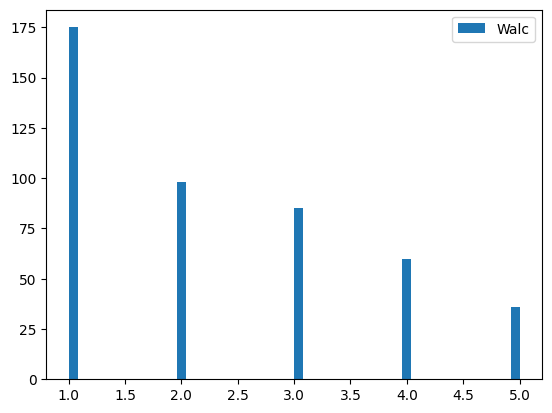

In [61]:
df["Walc"].hist(grid=False, bins=50, legend=True)

## Целевая зависимость: "G3" (Final Grade)

<Axes: xlabel='G3', ylabel='Density'>

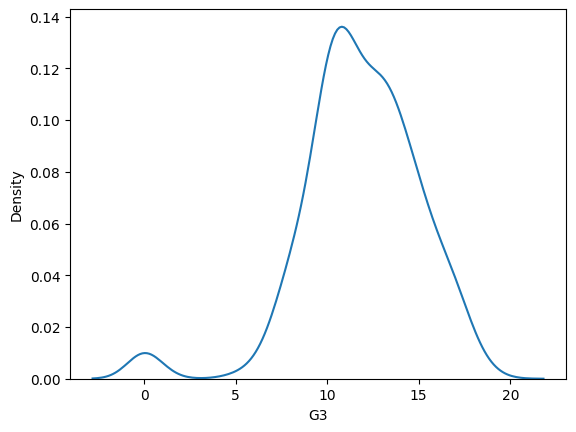

In [62]:
sns.kdeplot(df["G3"])

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

### usefull

In [63]:
df["health"].value_counts()

,count
health,
5,175
3,85
4,76
1,62
2,56


In [64]:
df["goout"].value_counts()

,count
goout,
3,141
2,105
4,94
5,85
1,29


###4 more


categorical

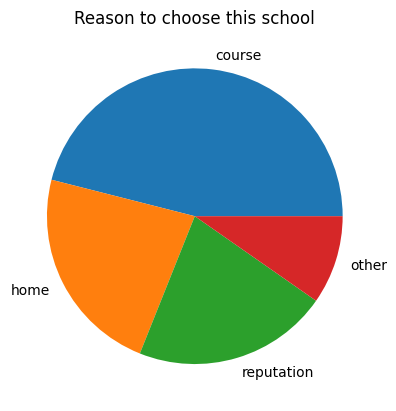

In [65]:
reason = df["reason"].value_counts()
plt.pie(np.array(reason), labels=np.array(reason.index))
plt.title("Reason to choose this school")
plt.show()

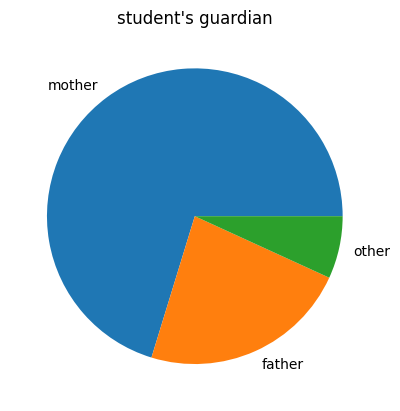

In [66]:
guardian = df["guardian"].value_counts()
plt.pie(np.array(guardian), labels=np.array(guardian.index))
plt.title("student's guardian")
plt.show()

numeric

<Axes: xlabel='failures', ylabel='G3'>

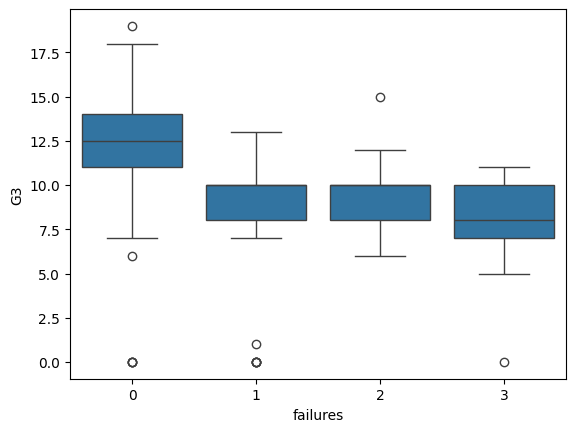

In [67]:
sns.boxplot(x=df["failures"], y=df["G3"])

<Axes: xlabel='freetime', ylabel='G3'>

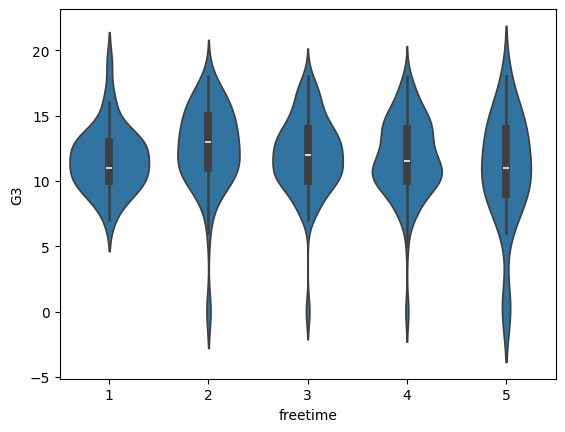

In [68]:
sns.violinplot(x=df["freetime"], y=df["G3"])

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [69]:
df1 = df.drop(["school", "sex", "address", "famsize", "Pstatus",
               "Mjob", "Fjob", "reason","guardian",
               "schoolsup", "famsup", "schoolsup", "paid", "activities",
               "nursery", "higher", "internet", "romantic"], axis=1)

<Axes: >

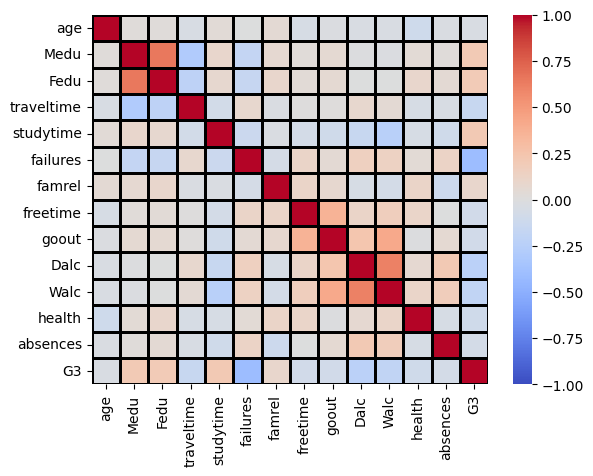

In [70]:
sns.heatmap(df1.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [71]:
for col in df.columns:
    print(col, df[col].nunique())

school 2
sex 6
age 16
address 2
famsize 2
Pstatus 2
Medu 5
Fedu 5
Mjob 5
Fjob 5
reason 4
guardian 3
traveltime 4
studytime 4
failures 4
schoolsup 2
famsup 2
paid 2
activities 2
nursery 2
higher 2
internet 2
romantic 2
famrel 5
freetime 5
goout 5
Dalc 5
Walc 5
health 5
absences 22
G3 17


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

In [72]:
df[(df["G3"]>=12) & (df["traveltime"]>=3)].groupby("G3")["sex"].value_counts()
# с кругами возиться тут сильно впадлу, простите😢

G3  sex
12  F      1
    M      1
13  F      4
    M      2
14  F      3
    M      3
15  F      1
16  F      2
    M      1
18  F      1
Name: count, dtype: int64

## Построить boxplot для оценок по возрасту.  

<Axes: xlabel='age', ylabel='G3'>

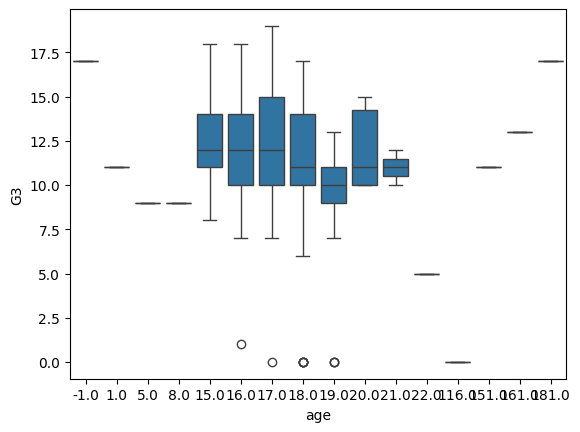

In [73]:
sns.boxplot(x=df["age"], y=df["G3"])

## Найти id топ-5 самых юных отличников.

In [74]:
# top_5_young = df.groupby('year').apply(lambda x: x.nsmallest(5, 'duration_ms')).reset_index(drop=True)
df[["age", "G3"]][df["G3"]>14].nsmallest(n=5, columns='age').index

Index([249, 50, 109, 112, 197], dtype='int64')

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [75]:
pd.concat([df.groupby("age")["G3"].max(), df.groupby("age")["G3"].min()], axis=1)

,G3,G3
age,,
-1.0,17,17
1.0,11,11
5.0,9,9
8.0,9,9
15.0,18,8
16.0,18,1
17.0,19,0
18.0,17,0
19.0,13,0


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

In [155]:
df = pd.read_csv('train_features_with_answers.csv')
# df.info()

## Найдите и исправьте ошибки в данных

In [156]:
df['sex'] = df['sex'].where(df['sex'].isin(["F", "M"]), np.nan)
# df.info()

## Удалите скоррелированные данные

In [157]:
df.drop("Fedu", axis=1, inplace = True)
# df.info()

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [158]:
df_r = df.copy()
df_r.replace(float('nan'), np.nan, inplace=True) # мб воркает...
df_r["age"] = df_r["age"].fillna(df_r["age"].mode()[0]) # насчет такого мува тоже не уверен
df_r["sex"] = df_r["sex"].fillna(df_r["sex"].mode()[0])
df_r = df_r[(15<= df_r['age']) & (df_r['age']<=22)]
df_r["address"] = df_r["address"].fillna(df_r["address"].mode()[0]) # четко
df_r.reset_index(drop=True, inplace=True)
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      446 non-null    object 
 1   sex         446 non-null    object 
 2   age         446 non-null    float64
 3   address     446 non-null    object 
 4   famsize     446 non-null    object 
 5   Pstatus     446 non-null    object 
 6   Medu        446 non-null    int64  
 7   Mjob        446 non-null    object 
 8   Fjob        446 non-null    object 
 9   reason      446 non-null    object 
 10  guardian    446 non-null    object 
 11  traveltime  446 non-null    int64  
 12  studytime   446 non-null    int64  
 13  failures    446 non-null    int64  
 14  schoolsup   446 non-null    object 
 15  famsup      446 non-null    object 
 16  paid        446 non-null    object 
 17  activities  446 non-null    object 
 18  nursery     446 non-null    object 
 19  higher      446 non-null    o

## Закодируйте категориальные признаки

In [194]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

categorical = ["school", "sex", "address", "famsize", "Pstatus",
               "Mjob", "Fjob", "reason","guardian",
               "schoolsup", "famsup", "paid", "activities",
               "nursery", "higher", "internet", "romantic"]
enc_fea = enc.fit_transform(df_r[categorical])
encoded_df = pd.DataFrame(enc_fea, columns=enc.get_feature_names_out(categorical))
df_enc = pd.concat([df_r.drop(categorical, axis=1), encoded_df], axis=1)
# df_encoded.info()

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [195]:
#    1) freetime - 0.666*goout
#( Логика: пробуем понять насколько человек deadinside/интроверт.
# Если у него много времени и он его тратит на чилл с кентами, то новый признак будет небольшой)

#    2) ((age-5)**2) * 0.52*Walc
#( Логика: Возможно, человек с возрастом уже привык к алкоголю и это его даже бустит, тогда новый признак будет заметно выше у страших, которые постоянно выпивают)

In [196]:
float('nan') == float('nan')

False

In [197]:
df_enc["deadinside"] = df_enc.apply(lambda row: row['freetime'] - 0.666*row['goout'], axis=1)
df_enc["alcho_boost"] = df_enc.apply(lambda row: ((row['age']-5)**2) * 0.52*row['Walc'], axis=1)

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [114]:
from sklearn.model_selection import cross_val_score


## Разделите данные и объясните выбор стратегии

__Ваш ответ:__ KFold - рабочая база, пойдет

sklearn solo :)

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [163]:
df = df_enc.copy()
# вроде всё норм:
# for col in df.columns:
#     print(col, df[col].nunique())

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [116]:
# Ваш код

In [117]:
#а пропусков не видно(

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [237]:
df = df_enc.copy()
# таких экземпляров слишком уж мало
df = df[(df["G3"] != 1) & (df["G3"] != 5) & (df["G3"] != 6) & (df["G3"] != 19) & (df["G3"] != 18)]
df.reset_index(drop=True, inplace=True)

X = df.drop("G3", axis=1)
# y = np.array(df["G3"]).reshape(-1,1).ravel()
y = df["G3"]

print(X.shape, y.shape)
# df["G3"].value_counts()

(435, 57) (435,)


## KNN

100%|██████████| 20/20 [00:01<00:00, 14.77it/s]


cv_score depend on n_neighbors, let's take n=16


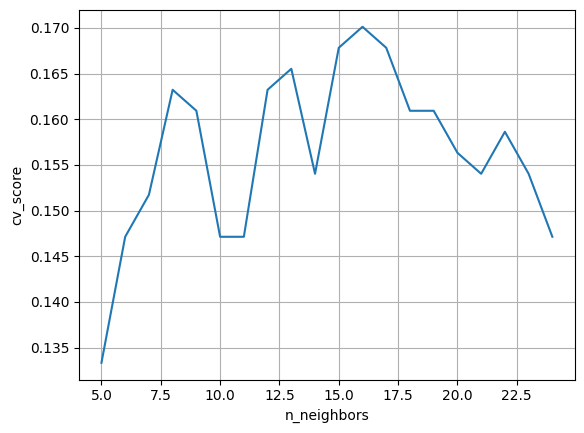

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

cv_score = []
max_cv = 0
best_n = 1
mass_of_n = np.arange(5, 25)
for n in tqdm(mass_of_n):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv = np.mean(cross_val_score(knn, X, y))
    cv_score.append(cv)
    if cv > max_cv:
        best_n = n
        max_cv = cv

print(f"cv_score depend on n_neighbors, let's take n={round(best_n, 5)}")
plt.plot(mass_of_n, cv_score)
plt.xlabel("n_neighbors")
plt.ylabel("cv_score")
plt.grid()

## Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
print(np.mean(cross_val_score(nb, X, y, cv=5)))

0.08045977011494253


## Регрессия

In [39]:
# from sklearn.linear_model import LogisticRegression

# start = 0.1
# stop = 1.5
# step = 0.1
# cv_score = []
# max_cv = 0
# best_c = start
# mass_of_c = np.arange(start, stop+step, step)
# for c in tqdm(mass_of_c):
#     regr = LogisticRegression(C=c, max_iter=500, random_state=42)
#     cv = np.mean(cross_val_score(regr, X, y))
#     cv_score.append(cv)
#     if cv > max_cv:
#         best_c = c
#         max_cv = cv

# print(f"cv_score depend on C, let's take c={round(best_c, 5)}")
# plt.plot(mass_of_c, cv_score)
# plt.xlabel("C")
# plt.ylabel("cv_score")
# plt.grid()


## SVM

 13%|█▎        | 2/15 [00:00<00:02,  5.05it/s]

12.177011494252874
9.404597701149426


 27%|██▋       | 4/15 [00:00<00:02,  5.08it/s]

9.222988505747127
9.280459770114943


 33%|███▎      | 5/15 [00:01<00:02,  4.56it/s]

9.280459770114943


 47%|████▋     | 7/15 [00:01<00:01,  4.81it/s]

9.280459770114943
9.280459770114943


 53%|█████▎    | 8/15 [00:01<00:01,  4.88it/s]

9.271264367816093


 60%|██████    | 9/15 [00:01<00:01,  4.88it/s]

9.273563218390805


 67%|██████▋   | 10/15 [00:02<00:01,  4.83it/s]

9.273563218390805


 73%|███████▎  | 11/15 [00:02<00:00,  4.84it/s]

9.273563218390805


 80%|████████  | 12/15 [00:02<00:00,  4.50it/s]

9.273563218390805


 87%|████████▋ | 13/15 [00:02<00:00,  4.01it/s]

9.273563218390805


 93%|█████████▎| 14/15 [00:03<00:00,  3.61it/s]

9.273563218390805


100%|██████████| 15/15 [00:03<00:00,  4.28it/s]

9.27816091954023
cv_score depend on C, let's take c=0.5


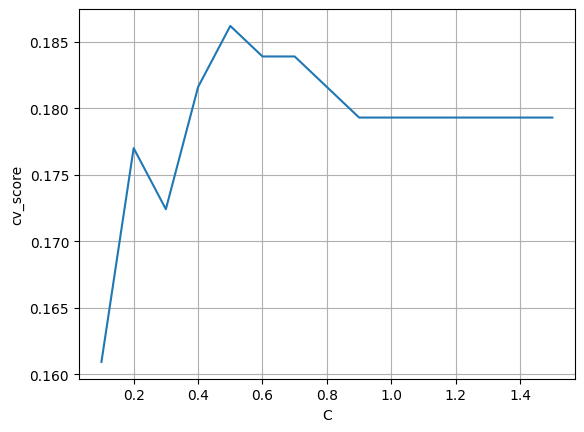

In [267]:
from sklearn.svm import SVC

start = 0.1
stop = 1.5
step = 0.1
cv_score = []
max_cv = 0
best_c = start
mass_of_c = np.arange(start, stop+step, step)
for c in tqdm(mass_of_c):
    svc = SVC(C=c, random_state=42)
    cv = np.mean(cross_val_score(svc, X, y))
    cv_score.append(cv)
    if cv > max_cv:
        best_c = c
        max_cv = cv

print(f"cv_score depend on C, let's take c={round(best_c, 5)}")
plt.plot(mass_of_c, cv_score)
plt.xlabel("C")
plt.ylabel("cv_score")
plt.grid()

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [238]:
#все модели супер плохи, поэтому возьмем просто Voting (и опираемся больше на svc)
# а logregr вообще хочется выкинуть, надоели эти предпреждения о max_iter...
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=16)
svc = SVC(C=0.5, random_state=42)
nb = GaussianNB()

voting = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('nb', nb)],
                          weights=[2,3,2])
print(np.mean(cross_val_score(voting, X, y, cv=5)))

0.1885057471264368


Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

In [239]:
knn = KNeighborsClassifier(n_neighbors=n).fit(X,y)
svc = SVC(C=0.5, random_state=42).fit(X,y)
nb = GaussianNB().fit(X,y)

# Получим предсказания
pred_knn = knn.predict(X)
pred_svc = svc.predict(X)
pred_nb = nb.predict(X)

# Создадим DataFrame для предсказаний
predictions_df = pd.DataFrame({
    'KNN': pred_knn,
    'SVC': pred_svc,
    'NB': pred_nb
})
# Вычислим корреляцию между предсказаниями
correlation_matrix = predictions_df.corr()
print(correlation_matrix)

          KNN       SVC        NB
KNN  1.000000  0.490511  0.050541
SVC  0.490511  1.000000  0.157149
NB   0.050541  0.157149  1.000000


In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

knn = KNeighborsClassifier(n_neighbors=15)
svc = SVC(C=0.5, random_state=42)
nb = GaussianNB()


estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('svc', SVC(C=0.5, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, random_state=42)
)

print(np.mean(cross_val_score(clf, X, y, cv=3)))

0.18160919540229883


## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

------------------------------------------PREPARE X_TEST------------------------------------------

In [241]:
X_test = pd.read_csv('X_test.csv')

X_test.drop("Fedu", axis=1, inplace=True)

enc = OneHotEncoder(sparse_output=False)

categorical = ["school", "sex", "address", "famsize", "Pstatus",
               "Mjob", "Fjob", "reason","guardian",
               "schoolsup", "famsup", "paid", "activities",
               "nursery", "higher", "internet", "romantic"]
enc_fea = enc.fit_transform(X_test[categorical])
encoded_df = pd.DataFrame(enc_fea, columns=enc.get_feature_names_out(categorical))
df_encoded = pd.concat([X_test.drop(categorical, axis=1), encoded_df], axis=1)

df_encoded["deadinside"] = df_encoded.apply(lambda row: row['freetime'] - 0.666*row['goout'], axis=1)
df_encoded["alcho_boost"] = df_encoded.apply(lambda row: ((row['age']-5)**2) * 0.52*row['Walc'], axis=1)

X_test = df_encoded.copy()
X_test.head()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,deadinside,alcho_boost
0,18,4,1,2,0,3,2,4,1,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.664,351.52
1,16,3,1,2,0,2,3,3,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.002,125.84
2,18,4,2,2,0,4,3,5,1,2,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.330,175.76
3,16,4,1,2,0,5,3,2,1,3,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.668,188.76
4,15,1,1,2,0,3,3,4,2,4,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.336,208.00


In [242]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('svc', SVC(C=0.5, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=10000)
).fit(X, y)

predicts = clf.predict(X_test)
# predicts

In [243]:
# Для colab notebook

from google.colab import files

submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['G3'] = predicts # ваше предсказание
submission.to_csv('submission.csv', index=False)
submission.T
# files.download('data/submission.csv')

id,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
G3,15,10,15,12,11,13,13,10,15,12,...,15,15,14,13,12,10,12,14,13,13


<Axes: xlabel='G3', ylabel='Density'>

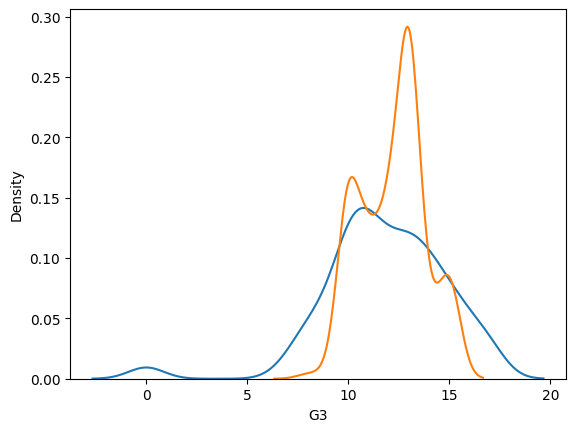

In [244]:
sns.kdeplot(y)
sns.kdeplot(predicts)

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.

In [257]:
from sklearn.metrics import roc_auc_score

In [268]:
#1 already
#2
X_av = X.copy() #сохраним базовый train
X_test_av = X_test.copy() #сохраним базовый test

X_av["is_test"] = 0
X_test_av["is_test"]  = 1
all = pd.concat([X_av, X_test_av], axis=0, ignore_index=True)
    # +SHAFFLE
# all = all.sample(frac=1)

#new train and target
X_all = all.drop(['is_test'], axis=1)
y_all = all['is_test']

#fitting
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=16)),
    ('nb', GaussianNB()),
    ('svc', SVC(C=0.5, random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, random_state=42)
).fit(X_all,y_all)

auc_score = roc_auc_score(y_all, clf.predict_proba(X_all)[:,1])
print(auc_score, "если больше 0.5, то шансы есть; вроде норм")

0.659463601532567 если больше 0.5, то шансы есть; вроде норм


In [269]:
#predict proba
X_new = X_all.copy()
X_new['proba'] = clf.predict_proba(X_all)[:,1]
X_new['is_test'] = y_all

# оставляем только обучающую
X_new = X_new[X_new['is_test']==0]

#sorting
nrows = X_new.shape[0]

sorted = X_new.sort_values(by='proba',ascending=False)

#выделяем 10 % на валидацию
ind = sorted[:int(nrows*.1)].index
ind2 = sorted[int(nrows*.1):].index

X_valid = X.iloc[ind]
y_valid = y.iloc[ind]
X_train = X.iloc[ind2]
y_train = y.iloc[ind2]

Ориентируемся на MSE

In [284]:
%%time
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, mean_squared_error
mse = make_scorer(mean_squared_error,greater_is_better=False)

estimators = [
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('svc', SVC(random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, random_state=42)
)


start = 0.05
stop = 0.11
step = 0.01
param_grid = {
    "knn__n_neighbors": np.arange(5, 13),
    "svc__C": np.arange(start, stop+step, step),
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, scoring=mse)
search.fit(X_train, y_train)
print("Best parameter (MSE score=%0.3f):" % search.best_score_)
print("svc__C :", search.best_params_["svc__C"])
print("knn__n_neighbors :", search.best_params_["knn__n_neighbors"])

Best parameter (MSE score=-7.880):
svc__C : 0.08000000000000002
knn__n_neighbors : 10
CPU times: user 2.87 s, sys: 403 ms, total: 3.27 s
Wall time: 2min 7s


Теперь ещё раз подберем параметры, так, чтобы на валидации (которая близка к тесту, было наименьшее MSE)

In [289]:
start = 0.08
stop = 0.11
step = 0.01
param_grid = {
    "knn__n_neighbors": np.arange(7, 13),
    "svc__C": np.arange(start, stop+step, step),
}


for c in np.arange(start, stop+step, step):
    for n in np.arange(7, 13):
        estimators = [
            ('knn', KNeighborsClassifier(n_neighbors=n)),
            ('nb', GaussianNB()),
            ('svc', SVC(C=c, random_state=42))
        ]

        clf = StackingClassifier(
            estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, random_state=42)
        ).fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        print(round(c, 2), n, "MSE=", round(mean_squared_error(y_valid, y_pred), 3))

# и просто глазами выберем..

0.08 7 MSE= 12.558
0.08 8 MSE= 11.907
0.08 9 MSE= 11.186
0.08 10 MSE= 10.884
0.08 11 MSE= 9.605
0.08 12 MSE= 10.535
0.09 7 MSE= 12.558
0.09 8 MSE= 11.907
0.09 9 MSE= 9.977
0.09 10 MSE= 10.884
0.09 11 MSE= 9.326
0.09 12 MSE= 10.605
0.1 7 MSE= 16.256
0.1 8 MSE= 16.116
0.1 9 MSE= 16.116
0.1 10 MSE= 16.465
0.1 11 MSE= 16.209
0.1 12 MSE= 16.279
0.11 7 MSE= 14.791
0.11 8 MSE= 15.512
0.11 9 MSE= 15.721
0.11 10 MSE= 16.07
0.11 11 MSE= 15.326
0.11 12 MSE= 14.698


In [281]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=11)),
    ('nb', GaussianNB()),
    ('svc', SVC(C=0.09, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, random_state=42)
).fit(X, y)

predicts = clf.predict(X_test)
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['G3'] = predicts # ваше предсказание
submission.to_csv('submission.csv', index=False)
submission.T

id,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
G3,10,8,15,12,12,15,15,10,10,10,...,10,15,11,12,15,11,11,11,11,15


<Axes: xlabel='G3', ylabel='Density'>

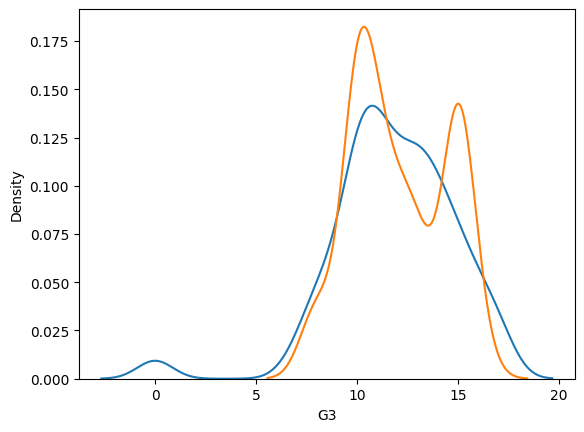

In [282]:
sns.kdeplot(y)
sns.kdeplot(predicts)